   Patient ID       Date  Blood Pressure (Systolic)  \
0         001 2025-03-01                        120   
1         001 2025-03-02                        122   
2         001 2025-03-03                        118   
3         002 2025-03-01                        135   
4         002 2025-03-02                        137   
5         002 2025-03-03                        130   
6         003 2025-03-01                        140   
7         003 2025-03-02                        142   
8         003 2025-03-03                        138   
9         004 2025-03-01                        125   
10        004 2025-03-02                        128   
11        004 2025-03-03                        123   

    Blood Pressure (Diastolic)  Sugar Level (mg/dL)  Weight (kg)  
0                           80                   95         75.0  
1                           82                   98         75.2  
2                           78                   92         74.8  
3               

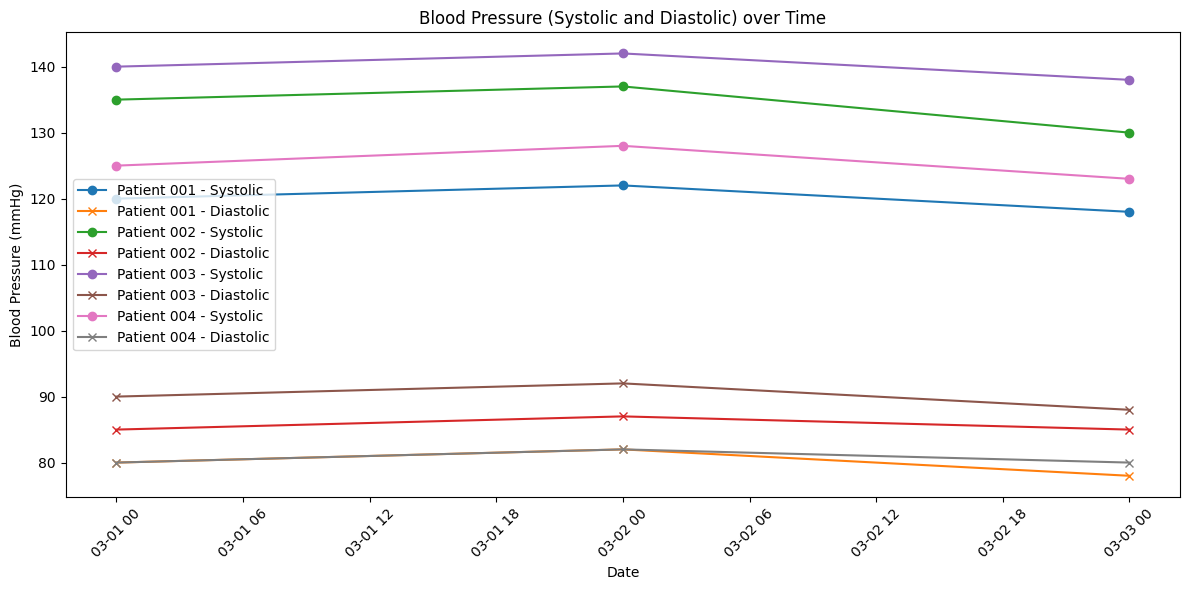

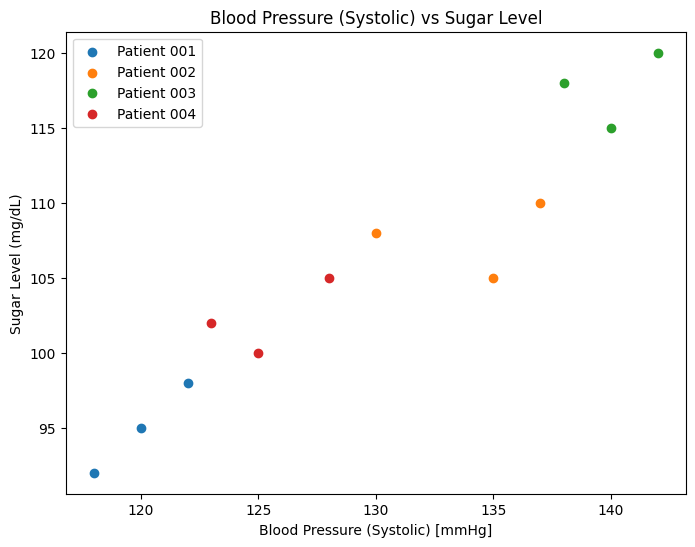

<ipython-input-2-fa9532b14a56>:63: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[df['Patient ID'] == patient]['Blood Pressure (Systolic)'] for patient in df['Patient ID'].unique()],


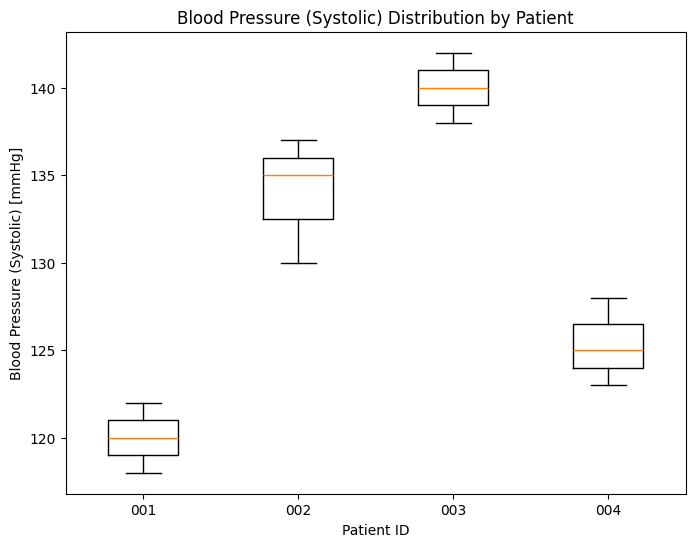

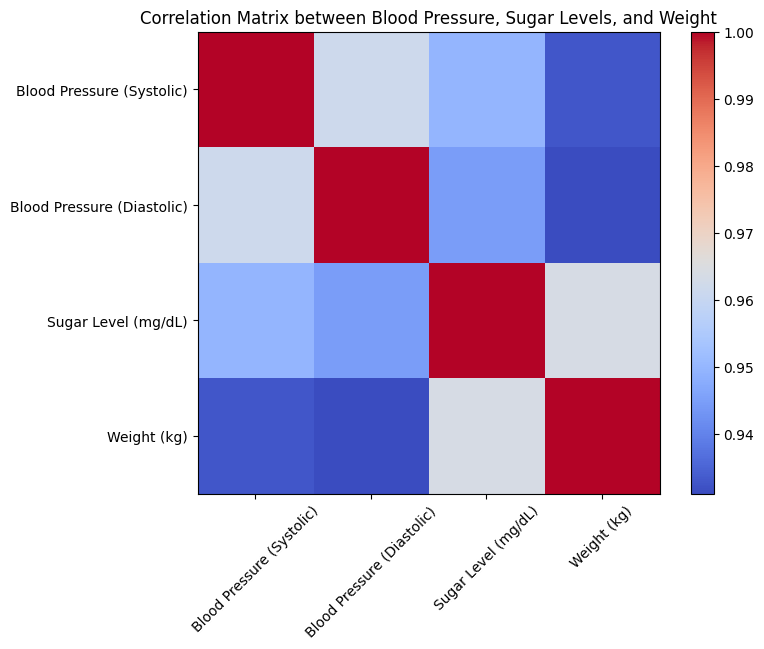

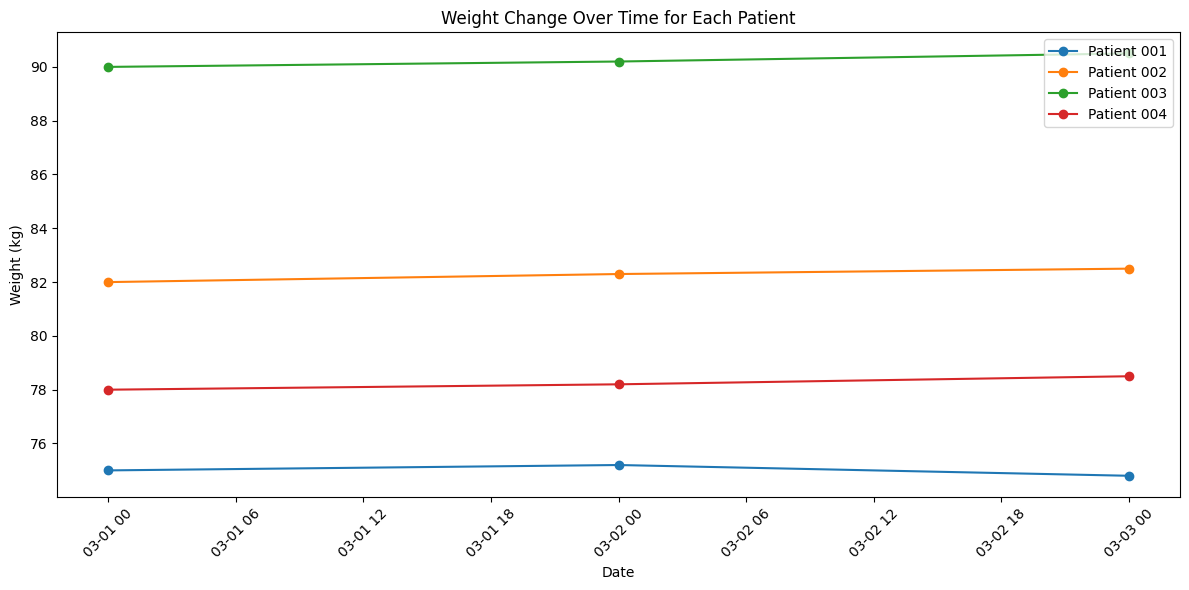

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Create a sample dataset for patient data
# This dataset includes Patient ID, Date, Blood Pressure (Systolic and Diastolic), Sugar Level, and Weight
data = {
    'Patient ID': ['001', '001', '001', '002', '002', '002', '003', '003', '003', '004', '004', '004'],
    'Date': ['2025-03-01', '2025-03-02', '2025-03-03', '2025-03-01', '2025-03-02', '2025-03-03', '2025-03-01', '2025-03-02', '2025-03-03', '2025-03-01', '2025-03-02', '2025-03-03'],
    'Blood Pressure (Systolic)': [120, 122, 118, 135, 137, 130, 140, 142, 138, 125, 128, 123],
    'Blood Pressure (Diastolic)': [80, 82, 78, 85, 87, 85, 90, 92, 88, 80, 82, 80],
    'Sugar Level (mg/dL)': [95, 98, 92, 105, 110, 108, 115, 120, 118, 100, 105, 102],
    'Weight (kg)': [75, 75.2, 74.8, 82, 82.3, 82.5, 90, 90.2, 90.5, 78, 78.2, 78.5]
}

# Step 2: Convert the data into a Pandas DataFrame
df = pd.DataFrame(data)

# Step 3: Convert the 'Date' column to a datetime object for easier manipulation
df['Date'] = pd.to_datetime(df['Date'])

# Display the first few rows of the DataFrame
print(df)

# ---- Visualizations ----

# Step 4: Plot Blood Pressure (Systolic and Diastolic) over Time for Each Patient
plt.figure(figsize=(12, 6))  # Create a figure with specific size
for patient in df['Patient ID'].unique():  # Loop through each unique patient ID
    patient_data = df[df['Patient ID'] == patient]  # Filter the dataset for this patient
    # Plot Systolic Blood Pressure over time
    plt.plot(patient_data['Date'], patient_data['Blood Pressure (Systolic)'], label=f'Patient {patient} - Systolic', marker='o')
    # Plot Diastolic Blood Pressure over time
    plt.plot(patient_data['Date'], patient_data['Blood Pressure (Diastolic)'], label=f'Patient {patient} - Diastolic', marker='x')

# Adding labels and title to the plot
plt.xlabel('Date')  # X-axis label
plt.ylabel('Blood Pressure (mmHg)')  # Y-axis label
plt.title('Blood Pressure (Systolic and Diastolic) over Time')  # Title of the plot
plt.legend()  # Show legend for different lines
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust layout to avoid label overlap
plt.show()  # Show the plot

# Step 5: Scatter plot for Blood Pressure vs. Sugar Level
plt.figure(figsize=(8, 6))  # Create a new figure
# Loop through each patient and plot their Blood Pressure vs Sugar Level
for patient in df['Patient ID'].unique():
    patient_data = df[df['Patient ID'] == patient]  # Filter data for the patient
    # Scatter plot: Systolic Blood Pressure vs Sugar Level
    plt.scatter(patient_data['Blood Pressure (Systolic)'], patient_data['Sugar Level (mg/dL)'], label=f'Patient {patient}')

# Adding labels and title to the plot
plt.xlabel('Blood Pressure (Systolic) [mmHg]')  # X-axis label
plt.ylabel('Sugar Level (mg/dL)')  # Y-axis label
plt.title('Blood Pressure (Systolic) vs Sugar Level')  # Title of the plot
plt.legend()  # Show legend to identify patients
plt.show()  # Show the plot

# Step 6: Box plot for Blood Pressure Distribution (Systolic) for Each Patient
plt.figure(figsize=(8, 6))  # Create a new figure for the box plot
# Box plot for Blood Pressure (Systolic) by Patient ID
plt.boxplot([df[df['Patient ID'] == patient]['Blood Pressure (Systolic)'] for patient in df['Patient ID'].unique()],
            labels=df['Patient ID'].unique())  # Each patient gets a box plot
# Adding labels and title to the plot
plt.xlabel('Patient ID')  # X-axis label
plt.ylabel('Blood Pressure (Systolic) [mmHg]')  # Y-axis label
plt.title('Blood Pressure (Systolic) Distribution by Patient')  # Title of the plot
plt.show()  # Show the plot

# Step 7: Correlation Heatmap between Blood Pressure, Sugar Levels, and Weight
correlation_matrix = df[['Blood Pressure (Systolic)', 'Blood Pressure (Diastolic)', 'Sugar Level (mg/dL)', 'Weight (kg)']].corr()

# Create a heatmap to visualize the correlation between these features
plt.figure(figsize=(8, 6))  # Create a new figure for the heatmap
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')  # Heatmap display
plt.colorbar()  # Add a color bar to show correlation scale
# Set labels for the x and y axes based on the correlation matrix columns
plt.xticks(np.arange(4), correlation_matrix.columns, rotation=45)
plt.yticks(np.arange(4), correlation_matrix.columns)
plt.title('Correlation Matrix between Blood Pressure, Sugar Levels, and Weight')  # Title of the plot
plt.show()  # Show the heatmap

# Step 8: Weight Change Over Time for Each Patient
plt.figure(figsize=(12, 6))  # Create a figure with specific size
for patient in df['Patient ID'].unique():  # Loop through each unique patient ID
    patient_data = df[df['Patient ID'] == patient]  # Filter data for this patient
    # Plot Weight over time for each patient
    plt.plot(patient_data['Date'], patient_data['Weight (kg)'], label=f'Patient {patient}', marker='o')

# Adding labels and title to the plot
plt.xlabel('Date')  # X-axis label
plt.ylabel('Weight (kg)')  # Y-axis label
plt.title('Weight Change Over Time for Each Patient')  # Title of the plot
plt.legend()  # Show legend for different patients
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.tight_layout()  # Adjust layout
plt.show()  # Show the plot
